# Versuch mit 3 Kategorien

## Korpus laden

In [1]:
import pandas as pd
corpus = pd.read_csv("../../data/CSV/dataset_with_values_no_duplicates.csv")
corpus

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,difficult_words,num_dupes,number_of_tokens,number_of_types,decades,stemmed_text,POS_tags,POS,value,Hit
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,21,23,323.0,133.0,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,None
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,6,12,233.0,95.0,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,18,22,260.0,83.0,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,Yes
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,26,31,310.0,130.0,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,None
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,18,3,203.0,104.0,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,maybe i need some rehabor maybe just need some...,"['a filk artist', 'dance', 'dance-pop', 'elect...",459.9,28,2010,4.4,99.23,63,"{'neg': 0.048, 'neu': 0.509, 'pos': 0.443, 'co...",Your Love Is My Drug,...,26,34,383.0,142.0,2010s,mayb i need some rehabor mayb just need some ...,"['RB', 'PRP', 'VBP', 'DT', 'NN', 'RB', 'RB', '...",sick desperate hard loveyour loveyour own hazy...,0.035714,None
3786,your mama don't dance andyour daddy don't rock...,"['american', 'rock-pop']",290.7,53,1973,4.0,100.24,43,"{'neg': 0.042, 'neu': 0.9390000000000001, 'pos...",Your Mama Don't Dance,...,12,25,250.0,91.0,1970s,your mama do n't danc andyour daddi do n't ro...,"['PRP$', 'NN', 'VBP', 'RB', 'VB', 'DT', 'NN', ...",rollwhen old sinthere rollwhen backseatwhere n...,0.018868,None
3787,every day there's something newhoney to keep ...,"['american', 'death by gun', 'death by murder'...",230.4,32,1967,5.2,88.74,22,"{'neg': 0.008, 'neu': 0.651, 'pos': 0.341, 'co...",Your Precious Love,...,21,9,182.0,103.0,1960s,everi day there 's someth newhoney to keep me...,"['DT', 'NN', 'EX', 'VBZ', 'NN', 'NN', '_SP', '...",much itheaven abovewhoa precious abovewhoa pre...,0.031250,None
3788,once upon a timeonce when you were minei remem...,"['art rock', 'baroque pop', 'british', 'classi...",283.5,91,1986,3.6,92.80,46,"{'neg': 0.029, 'neu': 0.806, 'pos': 0.164, 'co...",Your Wildest Dreams,...,10,27,226.0,70.0,1980s,onc upon a timeonc when you were minei rememb...,"['RB', 'IN', 'DT', 'NN', 'WRB', 'PRP', 'VBD', ...",wildest new wildest youi wildest timeonce mine...,0.010989,No


## Teilung in Trainings- und Testdaten

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

labels = corpus["Hit"]
vector = TfidfVectorizer().fit_transform(corpus["lyrics"])

Nun schauen wir uns die Dimensionen der Matrix unseres vektorisierten Textes an. shape gibt uns die Dimensionen der Matrix als Tupel (n,m) zurück. n steht für die Zeilen der Matrix, m für die Spalten.

In [3]:
vector.shape

(3790, 68179)

Nun wollen wir diese Daten teilen. Da eine Zeile für einen Wikipediaartikel steht, müssen wir uns an der ersten Zahl im Tupel orientieren. Das Verhältnis, wie wir die Daten teilen, soll hier 80% Trainingsdaten und 20% Testdaten sein. Die Bezeichnung "X" für die Textdaten und die Bezeichnung "y" für die Labels ist typisch und wird auch so von Scikit learn in der Dokumentation genutzt. Dass das "X" großgeschrieben wird ist eine Konvention, die zeigt, dass es sich hier um eine Matrix handelt. Vektoren wie "y" werden kleingeschrieben.

In [4]:
X_train = vector[:int(3790*0.8)]
y_train = labels[:int(3790*0.8)]
X_test = vector[int(3790*0.8):]
y_test = labels[int(3790*0.8):]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3032, 68179)
(3032,)
(758, 68179)
(758,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import numpy as np


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(np.mean(y_pred == y_test))

0.5237467018469657


## Classification accuracy

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5237467018469657


## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix[:10] #verkürzte Darstellung, damit der Output nicht zu groß wird

array([[  0, 172,   0],
       [  0, 397,   0],
       [  0, 189,   0]])

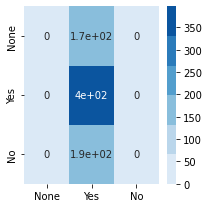

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Die Original Kategorienbezeichnungen
classes = corpus["Hit"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(3, 3))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()

## Der F1-score

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

labels = corpus["Hit"]
vector  = TfidfVectorizer().fit_transform(corpus["lyrics"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred, average="micro")
print(f"Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist {str(f1)}.")

Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist 0.5237467018469657.


In [11]:
from sklearn.metrics import classification_report
classes = corpus["Hit"].drop_duplicates().tolist()
print(classification_report(y_test, y_pred))
# alternativ
# print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       172
        None       0.52      1.00      0.69       397
         Yes       0.00      0.00      0.00       189

    accuracy                           0.52       758
   macro avg       0.17      0.33      0.23       758
weighted avg       0.27      0.52      0.36       758



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## k-fold cross validation 

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, vector, labels, cv=3)
np.mean(scores)

0.5139841012123703

## Evaluation in der Tutorialreihe 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

labels = corpus["Hit"]
vector  = TfidfVectorizer().fit_transform(corpus["lyrics"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

# cross validation des Trainingsdatensatzes
scores = cross_val_score(classifier, vector, labels, cv=3)
mean = np.mean(scores)

print("Der Mittelwert der cross validation bei der  Klassifizierung " 
      + f" mit Multinomial Naive Bayes ist {str(np.around(mean, decimals=3))}."
      + "\n")


# F1-score des Testdatensatzes
y_pred = classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average="micro")

print("Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist "
      + f"{str(np.around(f1, decimals=3))}.")

Der Mittelwert der cross validation bei der  Klassifizierung  mit Multinomial Naive Bayes ist 0.514.

Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist 0.524.


# Versuch nur mit Hit - no Hit

In [14]:
import pandas as pd
corpus = pd.read_csv("../../data/CSV/dataset_with_values_no_duplicates.csv")
corpus

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,difficult_words,num_dupes,number_of_tokens,number_of_types,decades,stemmed_text,POS_tags,POS,value,Hit
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,21,23,323.0,133.0,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,None
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,6,12,233.0,95.0,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,18,22,260.0,83.0,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,Yes
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,26,31,310.0,130.0,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,None
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,18,3,203.0,104.0,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,maybe i need some rehabor maybe just need some...,"['a filk artist', 'dance', 'dance-pop', 'elect...",459.9,28,2010,4.4,99.23,63,"{'neg': 0.048, 'neu': 0.509, 'pos': 0.443, 'co...",Your Love Is My Drug,...,26,34,383.0,142.0,2010s,mayb i need some rehabor mayb just need some ...,"['RB', 'PRP', 'VBP', 'DT', 'NN', 'RB', 'RB', '...",sick desperate hard loveyour loveyour own hazy...,0.035714,None
3786,your mama don't dance andyour daddy don't rock...,"['american', 'rock-pop']",290.7,53,1973,4.0,100.24,43,"{'neg': 0.042, 'neu': 0.9390000000000001, 'pos...",Your Mama Don't Dance,...,12,25,250.0,91.0,1970s,your mama do n't danc andyour daddi do n't ro...,"['PRP$', 'NN', 'VBP', 'RB', 'VB', 'DT', 'NN', ...",rollwhen old sinthere rollwhen backseatwhere n...,0.018868,None
3787,every day there's something newhoney to keep ...,"['american', 'death by gun', 'death by murder'...",230.4,32,1967,5.2,88.74,22,"{'neg': 0.008, 'neu': 0.651, 'pos': 0.341, 'co...",Your Precious Love,...,21,9,182.0,103.0,1960s,everi day there 's someth newhoney to keep me...,"['DT', 'NN', 'EX', 'VBZ', 'NN', 'NN', '_SP', '...",much itheaven abovewhoa precious abovewhoa pre...,0.031250,None
3788,once upon a timeonce when you were minei remem...,"['art rock', 'baroque pop', 'british', 'classi...",283.5,91,1986,3.6,92.80,46,"{'neg': 0.029, 'neu': 0.806, 'pos': 0.164, 'co...",Your Wildest Dreams,...,10,27,226.0,70.0,1980s,onc upon a timeonc when you were minei rememb...,"['RB', 'IN', 'DT', 'NN', 'WRB', 'PRP', 'VBD', ...",wildest new wildest youi wildest timeonce mine...,0.010989,No


In [15]:
data1 = corpus[corpus['Hit'] == 'Yes']
data2 = corpus[corpus['Hit'] == 'No']

sample = pd.concat([data1, data2])
sample

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,difficult_words,num_dupes,number_of_tokens,number_of_types,decades,stemmed_text,POS_tags,POS,value,Hit
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,6,12,233.0,95.0,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,18,22,260.0,83.0,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,Yes
7,our life together is so precious togetherwe ha...,"['britannique', 'british', 'classic pop and ro...",288.0,4,1981,4.8,81.29,28,"{'neg': 0.068, 'neu': 0.625, 'pos': 0.308, 'co...",(Just Like) Starting Over,...,18,14,212.0,91.0,1980s,our life togeth is so preciou togetherw have ...,"['PRP$', 'NN', 'RB', 'VBZ', 'RB', 'JJ', 'NN', ...",precious speciallet long lovewhy nice alone ea...,0.250000,Yes
9,love is higher than a mountain love is thicker...,"['classic pop and rock', 'death by myocarditis']",224.1,8,1978,4.0,91.78,30,"{'neg': 0.062, 'neu': 0.7000000000000001, 'pos...",(Love Is) Thicker Than Water,...,13,18,177.0,68.0,1970s,love is higher than a mountain love is thicke...,"['NN', 'VBZ', 'JJR', 'IN', 'DT', 'NN', 'NN', '...",dreamheaven silent crazy dreamheaven dreamheav...,0.125000,Yes
15,sittin' in the morning suni'll be sittin' when...,"['american', 'blues', 'death by airplane', 'de...",223.2,4,1968,4.8,98.21,25,"{'neg': 0.018000000000000002, 'neu': 0.927, 'p...",(Sittin' On) The Dock Of The Bay,...,20,10,181.0,92.0,1960s,sittin ' in the morn suni 'll be sittin ' whe...,"['NNP', ""''"", 'IN', 'DT', 'NN', 'NN', 'VB', 'N...",same listentwo morning suni'll sittin evening ...,0.250000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,you never close your eyes anymore when i kiss ...,"['blue-eyed soul', 'dance rock']",386.1,90,1981,4.8,89.75,43,"{'neg': 0.059000000000000004, 'neu': 0.713, 'p...",You've Lost That Lovin' Feelin',...,24,19,304.0,115.0,1980s,you never close your eye anymor when i kiss y...,"['PRP', 'RB', 'VBP', 'PRP$', 'NNS', 'RB', 'WRB...",little beautiful lovin' everyday pleasei lipsa...,0.011111,No
3777,young emotions are mixed emotionsfor it's a wo...,"['all-time greatest hits', 'death by airplane']",186.3,85,1960,4.8,81.29,18,"{'neg': 0.053, 'neu': 0.608, 'pos': 0.339, 'co...",Young Emotions,...,15,6,131.0,64.0,1960s,young emot are mix emotionsfor it 's a wold w...,"['JJ', 'NNS', 'VBP', 'JJ', 'IN', 'PRP', 'VBZ',...",young mixed gentle full outyoung strange brave...,0.011765,No
3779,what's the sense in sharing this one and only ...,pop,397.8,89,1976,5.2,105.66,44,"{'neg': 0.031, 'neu': 0.669, 'pos': 0.30000000...",Young Hearts Run Free,...,16,28,352.0,138.0,1970s,what 's the sens in share thi one and onli li...,"['WP', 'VBZ', 'DT', 'NN', 'IN', 'VBG', 'DT', '...",only lost lonely busy young young high free lo...,0.011236,No
3784,i don't mindwhen you act your ageit suits me f...,rock,252.9,79,1983,4.0,100.24,37,"{'neg': 0.091, 'neu': 0.556, 'pos': 0.354, 'co...",Your Love Is Driving Me Crazy,...,15,20,210.0,85.0,1980s,i do n't mindwhen you act your ageit suit me ...,"['PRP', 'VBP', 'RB', 'VB', 'PRP', 'VBP', 'PRP$...",outsideof typedon't tight fit sweet oh loveyou...,0.012658,No


## Teilung in Traings- und Testdaten

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

labels = sample["Hit"]
vector = TfidfVectorizer().fit_transform(sample["lyrics"])

In [17]:
vector.shape

(1842, 40712)

In [18]:
X_train = vector[:int(1842*0.8)]
y_train = labels[:int(1842*0.8)]
X_test = vector[int(1842*0.8):]
y_test = labels[int(1842*0.8):]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1473, 40712)
(1473,)
(369, 40712)
(369,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import numpy as np


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(np.mean(y_pred == y_test))

0.5474254742547425


## Classification accuracy

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5474254742547425


## Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix[:10] #verkürzte Darstellung, damit der Output nicht zu groß wird

array([[100,  78],
       [ 89, 102]])

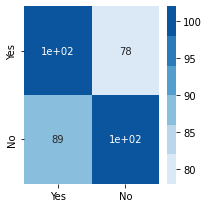

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Die Original Kategorienbezeichnungen
classes = sample["Hit"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(3, 3))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()

## Der F1-Score

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

labels = sample["Hit"]
vector  = TfidfVectorizer().fit_transform(sample["lyrics"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred, average="micro")
print(f"Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist {str(f1)}.")

Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist 0.5474254742547425.


In [25]:
from sklearn.metrics import classification_report
classes = sample["Hit"].drop_duplicates().tolist()
print(classification_report(y_test, y_pred))
# alternativ
# print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

          No       0.53      0.56      0.54       178
         Yes       0.57      0.53      0.55       191

    accuracy                           0.55       369
   macro avg       0.55      0.55      0.55       369
weighted avg       0.55      0.55      0.55       369



## k-fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, vector, labels, cv=3)
np.mean(scores)

0.5570032573289903

## Evaluation in der Tutorialreihe

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

labels = sample["Hit"]
vector  = TfidfVectorizer().fit_transform(sample["lyrics"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


# Multinomial Naive Bayes
classifier = MultinomialNB()
mnb = classifier.fit(X_train, y_train)

# cross validation des Trainingsdatensatzes
scores = cross_val_score(classifier, vector, labels, cv=3)
mean = np.mean(scores)

print("Der Mittelwert der cross validation bei der  Klassifizierung " 
      + f" mit Multinomial Naive Bayes ist {str(np.around(mean, decimals=3))}."
      + "\n")


# F1-score des Testdatensatzes
y_pred = classifier.predict(X_test)
f1 = f1_score(y_test, y_pred, average="micro")

print("Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist "
      + f"{str(np.around(f1, decimals=3))}.")

Der Mittelwert der cross validation bei der  Klassifizierung  mit Multinomial Naive Bayes ist 0.557.

Der F1-score für die Klassifizierung mit Multinomial Naive Bayes ist 0.547.
